<img src='http://imgur.com/1ZcRyrc.png' style='float: left; margin: 20px; height: 55px'>

# Capstone: A Lindy Hop Classifier

In [1]:
from google.colab import drive
drive.mount('/content/drive')
# drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
# pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 57.5 MB/s e

In [3]:
from pycaret.classification import *
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import pickle

In [39]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/merged.csv')

In [40]:
data.drop(columns=["recording_id",'nose_x', 'nose_y',
                'left_eye_x','left_eye_y', 'right_eye_x', 'right_eye_y',
                'left_ear_x', 'left_ear_y','right_ear_x', 'right_ear_y',
               'left_elbow_x', 'left_elbow_y','left_wrist_x', 'left_wrist_y'],inplace=True)

In [41]:
setup(data=data, target='move', numeric_imputation = 0, fix_imbalance=True) # numeric imputation as 0 as nulls are undetected keypoints

,Description,Value
0,Session id,1230
1,Target,move
2,Target type,Binary
3,Target mapping,"closed: 0, open: 1"
4,Original data shape,"(4819, 22)"
5,Transformed data shape,"(5372, 22)"
6,Transformed train set shape,"(3926, 22)"
7,Transformed test set shape,"(1446, 22)"
8,Ordinal features,1
9,Numeric features,20


In [42]:
# Train Accuracy
best_model = compare_models(include=['lr','rf', 'gbc', 'et', 'xgboost', 'dt', 'nb', 'svm', 'ridge', 'ada', 'lightgbm', 'knn'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9961,0.9999,0.9980,0.9955,0.9967,0.9921,0.9921,0.3750
lightgbm,Light Gradient Boosting Machine,0.9956,0.9999,0.9959,0.9964,0.9962,0.9909,0.9909,2.5130
xgboost,Extreme Gradient Boosting,0.9941,0.9998,0.9944,0.9954,0.9949,0.9878,0.9878,0.2970
rf,Random Forest Classifier,0.9938,0.9998,0.9964,0.9929,0.9947,0.9872,0.9872,0.9120
knn,K Neighbors Classifier,0.9840,0.9973,0.9832,0.9894,0.9862,0.9671,0.9673,0.1750
dt,Decision Tree Classifier,0.9775,0.9768,0.9806,0.9807,0.9806,0.9537,0.9538,0.2530
gbc,Gradient Boosting Classifier,0.9644,0.9942,0.9638,0.9750,0.9693,0.9270,0.9274,2.9320
ada,Ada Boost Classifier,0.8577,0.9353,0.8681,0.8853,0.8763,0.7088,0.7095,0.5660
ridge,Ridge Classifier,0.7373,0.0000,0.7326,0.7995,0.7643,0.4689,0.4715,0.0900
svm,SVM - Linear Kernel,0.7231,0.0000,0.7544,0.7891,0.7557,0.4313,0.4522,0.1960


Processing:   0%|          | 0/53 [00:00<?, ?it/s]

In [43]:
# Test Accuracy
rf_model = create_model('et')
predict_model(rf_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9852,0.9998,0.9949,0.9800,0.9874,0.9695,0.9696
1,0.9941,1.0000,0.9949,0.9949,0.9949,0.9878,0.9878
2,0.9941,1.0000,1.0000,0.9899,0.9949,0.9878,0.9879
3,0.9970,0.9998,1.0000,0.9949,0.9975,0.9939,0.9939
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9970,1.0000,1.0000,0.9949,0.9975,0.9939,0.9939
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9941,0.9999,1.0000,0.9899,0.9949,0.9878,0.9879


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9986,1.0000,0.9986,0.9986,0.9986,0.9972,0.9972


,person,left_shoulder_x,left_shoulder_y,right_shoulder_x,right_shoulder_y,right_elbow_x,right_elbow_y,right_wrist_x,right_wrist_y,left_hip_x,...,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,move,prediction_label,prediction_score
4517,follow,0.326799,0.527766,0.310734,0.528444,0.298438,0.596877,0.317981,0.650150,0.317374,...,0.728333,0.302699,0.739086,0.318246,0.811027,0.262581,0.817614,0,closed,1.00
3574,follow,0.231289,0.498048,0.204061,0.503552,0.192048,0.563934,0.216903,0.598242,0.220242,...,0.690901,0.199486,0.693947,0.204435,0.754759,0.175589,0.774302,0,closed,1.00
4770,follow,0.307850,0.498867,0.306477,0.501535,0.316720,0.570999,0.350745,0.580733,0.298841,...,0.717159,0.333171,0.709208,0.262566,0.800024,0.313224,0.806152,0,closed,0.99
2063,lead,0.428047,0.520747,0.434435,0.527986,0.431436,0.593672,0.457023,0.613063,0.423678,...,0.711585,0.443309,0.713296,0.380148,0.787007,0.417272,0.783423,1,open,1.00
3565,follow,0.230602,0.498315,0.210003,0.506800,0.200523,0.569945,0.223819,0.604511,0.225852,...,0.677751,0.207952,0.686484,0.245086,0.755952,0.176027,0.766584,0,closed,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,follow,0.434605,0.480326,0.383760,0.468621,0.346958,0.550259,0.354411,0.623270,0.429530,...,0.748058,0.429318,0.750339,0.415157,0.856580,0.426613,0.878129,1,open,0.99
484,follow,0.463174,0.486831,0.446117,0.483683,0.430286,0.545579,0.447870,0.596631,0.463733,...,0.693606,0.461137,0.697898,0.451649,0.774333,0.440792,0.790921,1,open,1.00
1222,follow,0.413668,0.488100,0.457860,0.492582,0.484089,0.549556,0.494707,0.550182,0.416875,...,0.693651,0.443119,0.707774,0.417406,0.774852,0.441486,0.806571,1,open,1.00
2166,lead,0.441759,0.515170,0.423638,0.516086,0.419312,0.576333,0.447289,0.578149,0.436138,...,0.691289,0.436761,0.695214,0.406606,0.732650,0.415316,0.774389,1,open,0.99


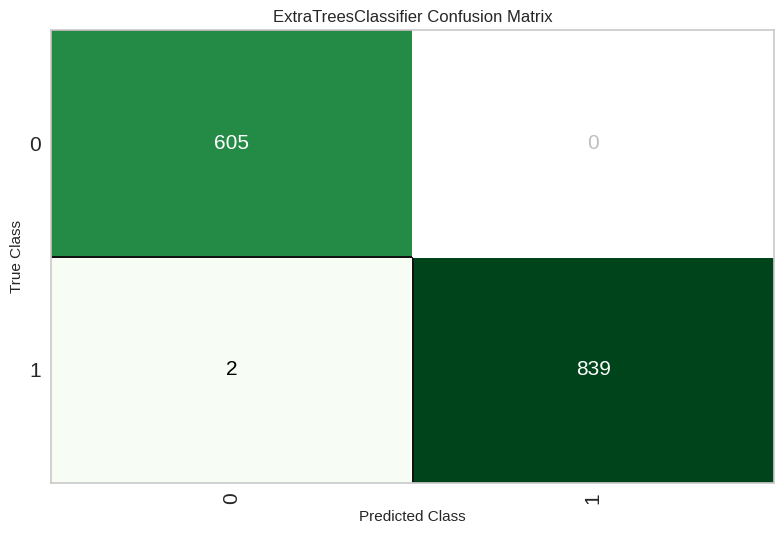

In [44]:
plot_model (rf_model,plot="confusion_matrix")

In [45]:
save_model(rf_model, 'et_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['left_shoulder_x',
                                              'left_shoulder_y',
                                              'right_shoulder_x',
                                              'right_shoulder_y',
                                              'right_elbow_x', 'right_elbow_y',
                                              'right_wrist_x', 'right_wrist_y',
                                              'l...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_

In [46]:
from google.colab import files
files.download('et_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>